In [41]:
# 导入sklearn算法包
from sklearn.linear_model import LogisticRegression  # 逻辑回归
from sklearn.naive_bayes import GaussianNB  # 朴素贝叶斯
from sklearn.neighbors import KNeighborsClassifier  # K-近邻
from sklearn.tree import DecisionTreeClassifier  # 决策树
from sklearn import svm  # 支持向量机


In [42]:
# 使用转换函数映射成浮点类型的数据
def iris_type(s):
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]


In [43]:
# 使用numpy中的loadtxt读入数据文件
import numpy as np
path = u'./iris/iris.data'  # 数据文件路径
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})


In [44]:
# 将Iris分为训练集与测试集
from sklearn.model_selection import train_test_split

x, y = np.split(data, (4,), axis=1)
x = x[:, :2]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=1, train_size=0.6)


In [45]:
# 训练svm分类器
# clf = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())


SVC(C=0.8, gamma=20)

In [46]:
# 计算svc分类器的准确率
# show_accuracy
from sklearn.metrics import accuracy_score
print(clf.score(x_train, y_train))  # 精度
y_hat = clf.predict(x_train)
accuracy_score(y_train, y_hat)  # , '训练集')
print(clf.score(x_test, y_test))
y_hat = clf.predict(x_test)
accuracy_score(y_test, y_hat)  # , '测试集')


0.8666666666666667
0.65


0.65

In [47]:
# 查看决策函数
print('decision_function:\n', clf.decision_function(x_train))
print('\npredict:\n', clf.predict(x_train))


decision_function:
 [[ 2.22221861  0.8455443  -0.17730991]
 [-0.21911337  2.19462449  1.11334479]
 [-0.21930265  1.01290437  2.21770973]
 [ 2.22224256  0.84514461 -0.17705194]
 [ 2.22325692  0.84421948 -0.17835395]
 [-0.21749798  0.96367573  2.22222029]
 [ 2.22221912  0.8455742  -0.17733364]
 [-0.21718151  2.16946662  1.15174301]
 [-0.19795922  0.87269057  2.22511692]
 [-0.22699002  1.10872816  2.20756693]
 [-0.22407027  2.22224348  1.01592353]
 [-0.20055133  0.89034348  2.22224539]
 [-0.22240351  2.17392942  1.15915787]
 [ 2.2222176   0.84554431 -0.1773079 ]
 [-0.17829104  2.22221349  0.84686503]
 [-0.21956665  1.08299942  2.20505017]
 [-0.21749798  0.96367573  2.22222029]
 [-0.19421164  2.22223247  0.87444253]
 [-0.1834087   0.84769919  2.22456541]
 [-0.20161076  2.22220288  0.89359282]
 [ 2.22041787  0.84809623 -0.17571406]
 [ 2.22667187  0.83979649 -0.18180543]
 [ 2.20598044  0.86631979 -0.1622033 ]
 [-0.20055133  0.89034348  2.22224539]
 [ 2.2290276   0.83658833 -0.18412717]
 [-0.

In [48]:
# 绘制图像
import matplotlib as mpl
import matplotlib.pyplot as plt

x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
# print 'grid_test = \n', grid_test
grid_hat = clf.predict(grid_test)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

# 指定默认字体
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False


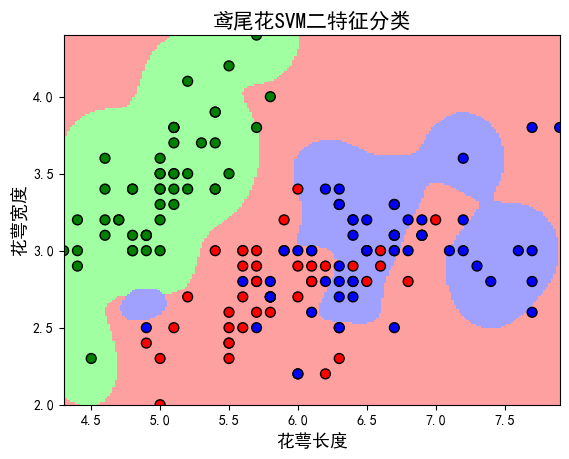

In [49]:
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)  # 样本
plt.scatter(x_test[:, 0], x_test[:, 1], s=120,
            facecolors='none', zorder=10)  # 圈中测试集样本
plt.xlabel(u'花萼长度', fontsize=13)
plt.ylabel(u'花萼宽度', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM二特征分类', fontsize=15)
# plt.grid()
plt.show()
